Problem Statement:
Build the linear regression model using scikit learn in boston data to predict 'Price' based on other dependent variable.

In [48]:
#Importing required Python packages
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pylab as plt
from scipy import sparse 
import sklearn
import seaborn
from pandas.plotting import scatter_matrix
from sklearn.decomposition import PCA 

plt.rcParams['figure.figsize'] = (15, 5) 

# Set some Pandas options 
pd.set_option('display.notebook_repr_html', False) 
pd.set_option('display.max_columns', 40) 
pd.set_option('display.max_rows', 25) 
pd.options.display.max_colwidth = 50

from sklearn.datasets import load_boston

In [4]:
boston = load_boston()
display(boston)

{'DESCR': "Boston House Prices dataset\n===========================\n\nNotes\n------\nData Set Characteristics:  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive\n    \n    :Median Value (attribute 14) is usually the target\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate per

In [5]:
bos = pd.DataFrame(boston.data)
display(bos)

          0     1      2    3      4      5      6       7    8      9     10  \
0    0.00632  18.0   2.31  0.0  0.538  6.575   65.2  4.0900  1.0  296.0  15.3   
1    0.02731   0.0   7.07  0.0  0.469  6.421   78.9  4.9671  2.0  242.0  17.8   
2    0.02729   0.0   7.07  0.0  0.469  7.185   61.1  4.9671  2.0  242.0  17.8   
3    0.03237   0.0   2.18  0.0  0.458  6.998   45.8  6.0622  3.0  222.0  18.7   
4    0.06905   0.0   2.18  0.0  0.458  7.147   54.2  6.0622  3.0  222.0  18.7   
5    0.02985   0.0   2.18  0.0  0.458  6.430   58.7  6.0622  3.0  222.0  18.7   
6    0.08829  12.5   7.87  0.0  0.524  6.012   66.6  5.5605  5.0  311.0  15.2   
7    0.14455  12.5   7.87  0.0  0.524  6.172   96.1  5.9505  5.0  311.0  15.2   
8    0.21124  12.5   7.87  0.0  0.524  5.631  100.0  6.0821  5.0  311.0  15.2   
9    0.17004  12.5   7.87  0.0  0.524  6.004   85.9  6.5921  5.0  311.0  15.2   
10   0.22489  12.5   7.87  0.0  0.524  6.377   94.3  6.3467  5.0  311.0  15.2   
11   0.11747  12.5   7.87  0

In [6]:
print(boston.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR'])


In [7]:
print(boston.data.shape)

(506, 13)


In [8]:
print(boston.target.shape)

(506,)


In [9]:
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [10]:
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [11]:
bos = pd.DataFrame(boston.data)
bos.head()

        0     1     2    3      4      5     6       7    8      9     10  \
0  0.00632  18.0  2.31  0.0  0.538  6.575  65.2  4.0900  1.0  296.0  15.3   
1  0.02731   0.0  7.07  0.0  0.469  6.421  78.9  4.9671  2.0  242.0  17.8   
2  0.02729   0.0  7.07  0.0  0.469  7.185  61.1  4.9671  2.0  242.0  17.8   
3  0.03237   0.0  2.18  0.0  0.458  6.998  45.8  6.0622  3.0  222.0  18.7   
4  0.06905   0.0  2.18  0.0  0.458  7.147  54.2  6.0622  3.0  222.0  18.7   

       11    12  
0  396.90  4.98  
1  396.90  9.14  
2  392.83  4.03  
3  394.63  2.94  
4  396.90  5.33  

In [12]:
bos.columns = boston.feature_names
bos.head()

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  
0     15.3  396.90   4.98  
1     17.8  396.90   9.14  
2     17.8  392.83   4.03  
3     18.7  394.63   2.94  
4     18.7  396.90   5.33  

In [15]:
boston.target[:5]

array([24. , 21.6, 34.7, 33.4, 36.2])

In [16]:
bos['PRICE'] = boston.target
display(bos['PRICE'])

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
5      28.7
6      22.9
7      27.1
8      16.5
9      18.9
10     15.0
11     18.9
       ... 
494    24.5
495    23.1
496    19.7
497    18.3
498    21.2
499    17.5
500    16.8
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: PRICE, Length: 506, dtype: float64

In [17]:
df = pd.concat([pd.DataFrame(boston.data, columns=boston.feature_names), pd.DataFrame(boston.target, columns=['MEDV'])], axis=1)
df.describe()

             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.593761   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.596783   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.647423   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.1057

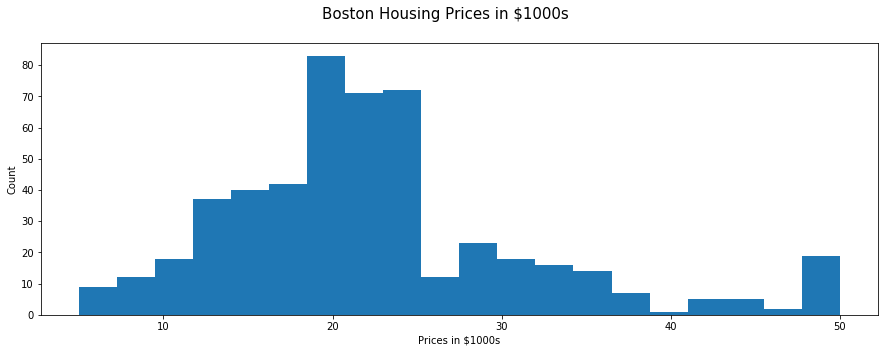

In [20]:
#Let's do a simple histogram on available house prices to see what we'll be working on
plt.hist(boston.target,bins=20)
plt.suptitle('Boston Housing Prices in $1000s', fontsize=15)
plt.xlabel('Prices in $1000s')
plt.ylabel('Count')
plt.show()

In [21]:
from sklearn.linear_model import LinearRegression
X = bos.drop('PRICE', axis = 1)
lm = LinearRegression()
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

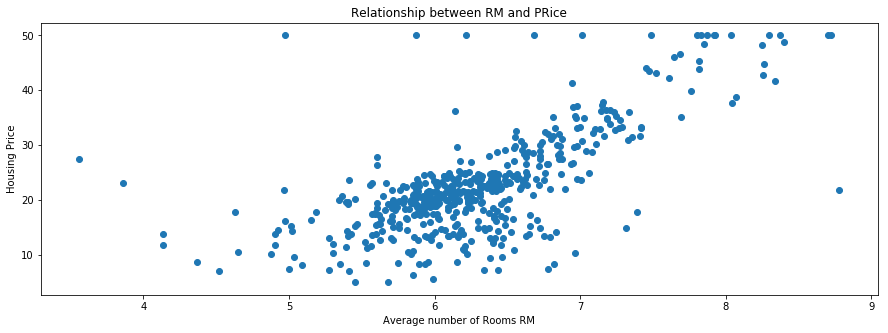

In [22]:
plt.scatter(bos.RM, bos.PRICE)
plt.xlabel('Average number of Rooms RM')
plt.ylabel('Housing Price')
plt.title('Relationship between RM and PRice')
plt.show()

In [25]:
lm.fit(X, bos.PRICE)
lm.predict(X)[0:5]

array([30.00821269, 25.0298606 , 30.5702317 , 28.60814055, 27.94288232])

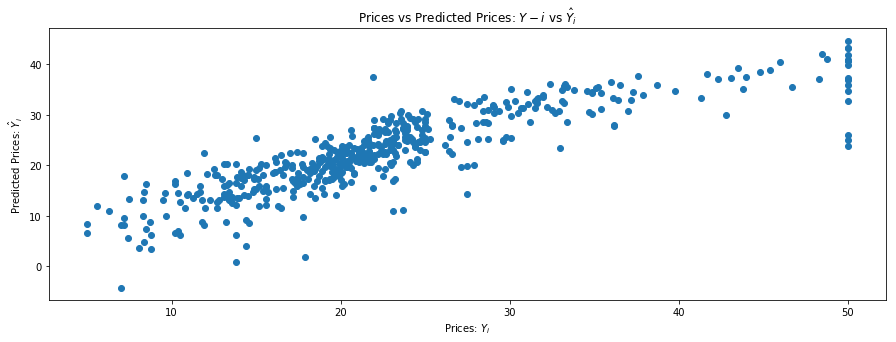

In [26]:
plt.scatter(bos.PRICE, lm.predict(X))
plt.xlabel('Prices: $Y_i$')
plt.ylabel('Predicted Prices: $\hat{Y}_i$')
plt.title('Prices vs Predicted Prices: $Y-i$ vs $\hat{Y}_i$')
plt.show()

In [27]:
mseFull = np.mean((bos.PRICE - lm.predict(X)) ** 2)
print(mseFull)

21.89777921768749


In [28]:
lm = LinearRegression()
lm.fit(X[['PTRATIO']], bos.PRICE)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [29]:
msePTRATIO = np.mean((bos.PRICE - lm.predict(X[['PTRATIO']])) ** 2)
print(msePTRATIO)

62.65220001376927


In [30]:
X_train = X[:-50]
X_test = X[-50:]
Y_train = bos.PRICE[:-50]
Y_test = bos.PRICE[-50:]
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(456, 13)
(50, 13)
(456,)
(50,)


In [32]:
X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(X, bos.PRICE, test_size=0.33, random_state = 5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(339, 13)
(167, 13)
(339,)
(167,)


In [34]:
lm = LinearRegression()
lm.fit(X_train, Y_train)
pred_train = lm.predict(X_train)
pred_test = lm.predict(X_test)

In [35]:
print ("Fit a model X_train, and calculate MSE with Y_train:", np.mean((Y_train - lm.predict(X_train)) ** 2))
print ("Fit a model X_train, and calculate MSE with X_test, Y_test:", np.mean((Y_test - lm.predict(X_test)) ** 2))

Fit a model X_train, and calculate MSE with Y_train: 19.54675847353465
Fit a model X_train, and calculate MSE with X_test, Y_test: 28.541367275619002


Text(0,0.5,'Residuals')

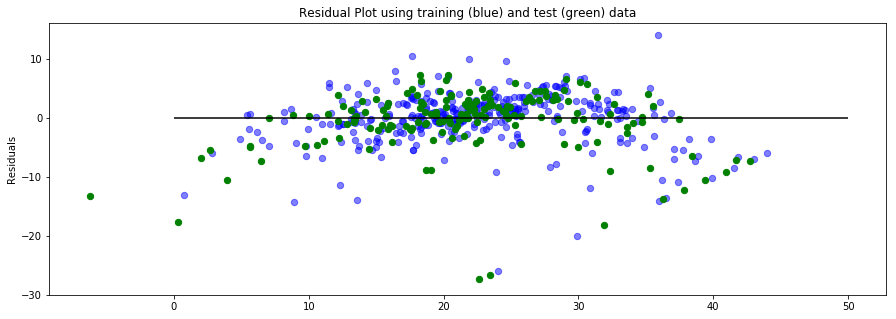

In [36]:
plt.scatter(lm.predict(X_train), lm.predict(X_train) - Y_train, c="b", s=40, alpha=0.5)
plt.scatter(lm.predict(X_test), lm.predict(X_test) - Y_test, c="g", s=40)
plt.hlines(y=0, xmin=0, xmax=50)
plt.title('Residual Plot using training (blue) and test (green) data')
plt.ylabel('Residuals')

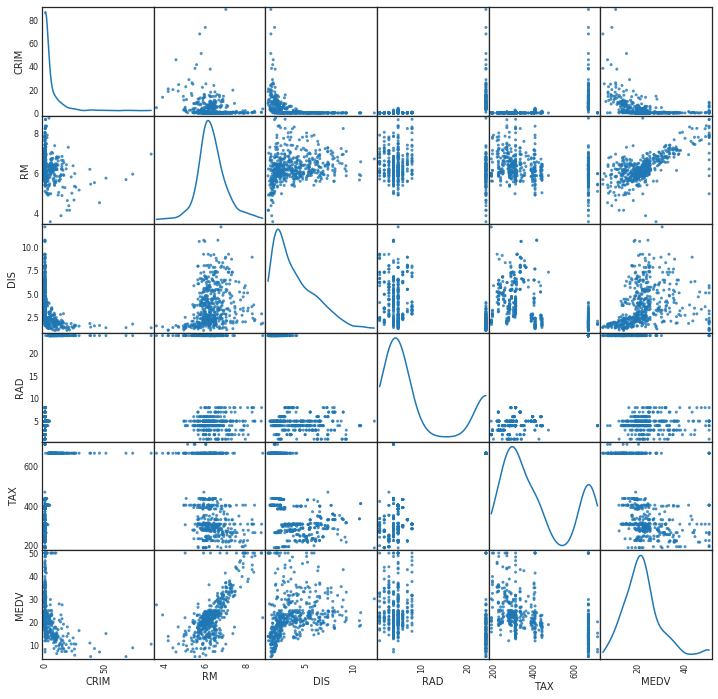

In [45]:
with seaborn.axes_style('white'):
    smaller_frame = df[['CRIM', 'RM', 'DIS', 'RAD', 'TAX','MEDV']]
    scatter_matrix(smaller_frame, alpha=0.8, figsize=(12, 12), diagonal="kde") 
plt.show()

In [46]:
df[['MEDV','RM','CRIM']].corr()

          MEDV       RM      CRIM
MEDV  1.000000  0.69536 -0.385832
RM    0.695360  1.00000 -0.219940
CRIM -0.385832 -0.21994  1.000000

In [51]:
# Principal component analysis (PCA) is a statistical procedure that uses an orthogonal transformation to 
# convert a set of observations of possibly correlated variables (entities each of which takes on various
# numerical values) into a set of values of linearly uncorrelated variables called principal components.

data_reduced=PCA(n_components=1).fit_transform(boston.data)
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(data_reduced, boston.target) 
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(379, 1) (127, 1) (379,) (127,)


In [54]:
linr=LinearRegression().fit(X_train, y_train) 
y_pred = linr.predict(X_test)
print ("R-squared for train: %.2f" %linr.score(X_train, y_train))

R-squared for train: 0.22


In [55]:
print ("R-squared for test: %.2f" %linr.score(X_test, y_test))

R-squared for test: 0.28


In [56]:
print ("Coefficients (Parameters theta_1..theta_n") 
print (linr.coef_) 
print ("Y intercept (theta_0): %.2f" %linr.intercept_)

Coefficients (Parameters theta_1..theta_n
[-0.02515628]
Y intercept (theta_0): 22.40


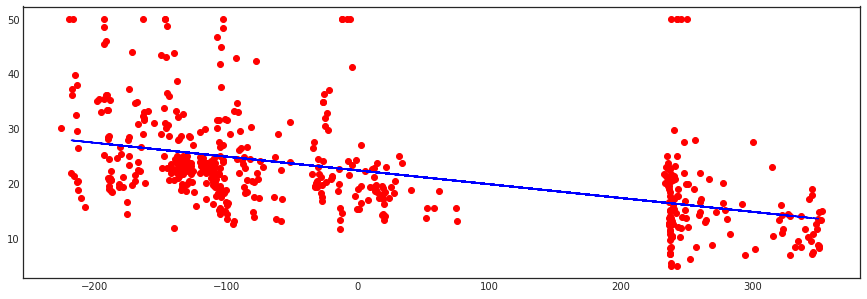

In [68]:
with seaborn.axes_style('white'):
    plt.scatter(data_reduced, boston.target, c='r') 
    plt.plot(X_test, y_pred,'--k', c='b') 
plt.show()